In [282]:
import numpy as np # This wont be used for the question its not asked for!!!
import matplotlib.pyplot as plt
import cv2
import random
import os
os.environ["QT_QPA_PLATFORM"] = "xcb"

##### Code from Ass1 for reference

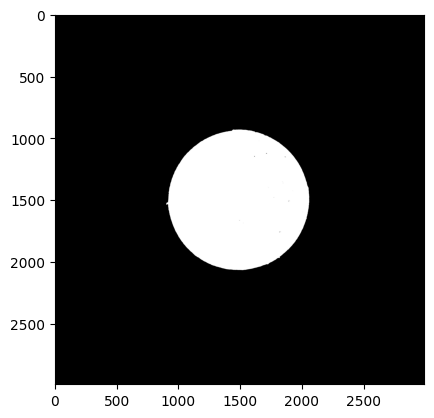

pixel radius = 567.069754244368
Image Radius in cm = 1.4214649588344788


In [283]:
circle_15cm_filled = "../Ass1/15cm_circle_filled.jpg"
circle_30cm_filled = "../Ass1/30cm_circle_filled.jpg"
circle_8cm_filled = "../Ass1/8cm_circle_filled.jpg"

circle_15cm_filled_matrix = cv2.imread(circle_15cm_filled)
circle_30cm_filled_matrix = cv2.imread(circle_30cm_filled)
circle_8cm_filled_matrix = cv2.imread(circle_8cm_filled)

circle_15cm_filled_gray = cv2.cvtColor(circle_15cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_30cm_filled_gray = cv2.cvtColor(circle_30cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_8cm_filled_gray = cv2.cvtColor(circle_8cm_filled_matrix, cv2.COLOR_BGR2GRAY)

# Isolating the circle

manual_threshold = 50

thresholed_8cm = []

for i in circle_8cm_filled_gray:
    row = []
    for j in i:
        if j > manual_threshold:
            row.append(j)
        else:
            row.append(0)
    thresholed_8cm.append(row)

plt.imshow(thresholed_8cm,cmap="gray")

thresholed_8cm = np.array(thresholed_8cm)

start_pixel = 700
end_pixel = 700
width = 1500

isolated_circle_8cm = np.zeros(np.shape(thresholed_8cm), dtype=thresholed_8cm.dtype)

for i in range(start_pixel, start_pixel + width):
    for j in range(end_pixel, end_pixel + width):
        if thresholed_8cm[i, j] < 50:
            isolated_circle_8cm[i, j] = 255

plt.imshow(isolated_circle_8cm, cmap="gray")
plt.show()

# Get area of the circle

circle_pixels = 0

for i in isolated_circle_8cm:
    for j in i:
        if j != 0:
            circle_pixels += 1

r = np.sqrt(circle_pixels/np.pi) # pixels
"""
Actual Radius = 1.35cm
2992pixel = 7.5cm
"""
print("pixel radius =",r)

multiplier = 7.5/2992 # cm/pixels
radius = multiplier * r # cm

print("Image Radius in cm =",radius)


## Question 1

In [284]:
# Calculating DPI

length_of_image_cm = 7.5 # cm
length_of_image_inch = length_of_image_cm / 2.54 # inch
dpi = 2992 / length_of_image_inch # pixels/inch
print("DPI of the image is =",dpi)

DPI of the image is = 1013.2906666666667


--------

## Question 2

In [285]:
page = cv2.imread("Number_of_Lines_Assignment_02.jpg")
page_gray = cv2.cvtColor(page, cv2.COLOR_BGR2GRAY)
page_gray = np.array(page_gray)
print("Shape of the image =",np.shape(page_gray))

Shape of the image = (3300, 2550)


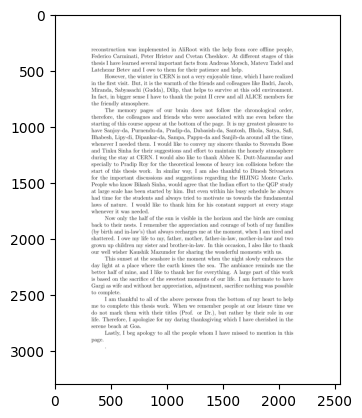

In [286]:
plt.imshow(page_gray, cmap='gray')

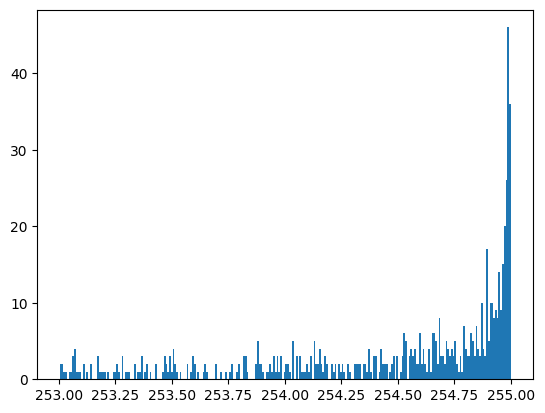

In [287]:
# plot the bar graph of mean of each row in page_gray
mean_of_rows = np.mean(page_gray, axis=1)
# plt.hist(mean_of_rows[np.where(mean_of_rows != 255.0)], bins=256)
plt.hist(mean_of_rows[np.where((mean_of_rows > 253.0) & (mean_of_rows != 255.0))], bins=256)
plt.show()

#### A Crude implementation
Problem with this is some lines contain only 1-5 words, thus the mean comes out to be very close to 255 (Actual no words row)

Thus the algorithm will get +-4 or 5 lines error

To make the algorithm better, we need to strengthen the lines with text

In [288]:
# 45 actual lines in the image
black_lines = 0
prev_mean = 0

for i in page_gray:
    count = 0
    # calc mean
    mean = np.mean(i)

    if mean < 254.75:
        if prev_mean > 254.75:
            black_lines += 1
    prev_mean = mean
print("Number of black lines in the image =",black_lines)

Number of black lines in the image = 46


#### Better implementation

In [289]:
kernel_3x3 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
kernel_5x5 = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
])
kernel_7x7 = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

def convolve2d(image, kernel):
    kh, kw = kernel.shape
    ih, iw = image.shape
    
    output = np.zeros((ih - kh + 1, iw - kw + 1))

    for i in range(ih - kh + 1):
        for j in range(iw - kw + 1):
            region = image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

In [290]:
# convolved_image_3x3 = convolve2d(page_gray, kernel_3x3)
# plt.imshow(convolved_image_3x3, cmap='gray')

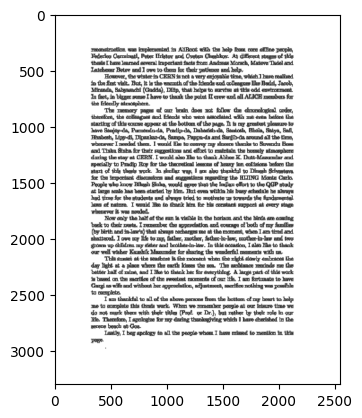

In [291]:
page_gray_thrs = page_gray.copy()

for i in page_gray_thrs:
    for j in range(len(i)):
        if i[j] < 255:
            i[j] = 0
        else:
            i[j] = 255

plt.imshow(page_gray_thrs, cmap='gray')

### Best Implementation out of all methods tried

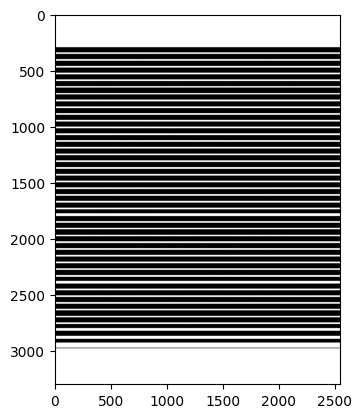

In [292]:
page_gray_lines = page_gray.copy()

for i in page_gray_lines:
    min_val = np.min(i)
    if min_val < 127:
        for j in range(len(i)):
            i[j] = 0

plt.imshow(page_gray_lines, cmap='gray')

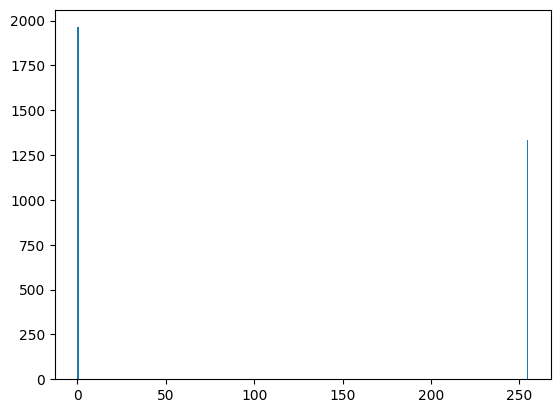

In [293]:
# plot the bar graph of mean of each row in page_gray
mean_of_rows = np.mean(page_gray_lines, axis=1)
plt.hist(mean_of_rows, bins=256)
plt.show()

In [294]:
# 45 actual lines in the image
black_lines = 0
prev_mean = 0

for row in page_gray_lines:
    count = 0
    s = 0.0

    for val in row:
        s += val
        count += 1

    mean = s / count

    if mean == 0.0:
        if prev_mean > 250.75:
            black_lines += 1

    prev_mean = mean
print("Number of black lines in the image =",black_lines)

Number of black lines in the image = 45


----

## Question 3

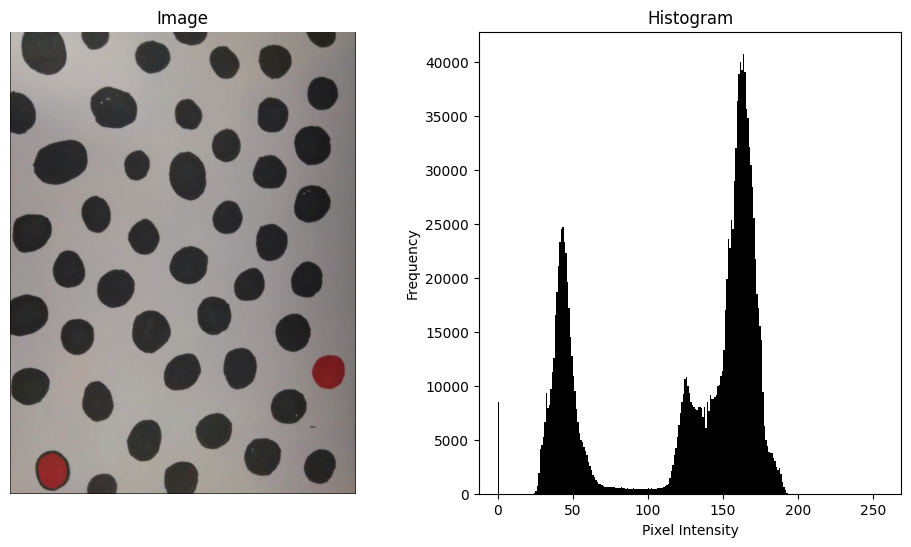

In [ ]:
dots_img = cv2.imread("dots.png")

def plot_image_and_histogram(image):
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')
    axs[0].set_title('Image')

    axs[1].hist(image.ravel(), bins=256, range=[0, 256], color='black')
    axs[1].set_title('Histogram')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')

    plt.show()

plot_image_and_histogram(dots_img)

#### Manual Thresholding

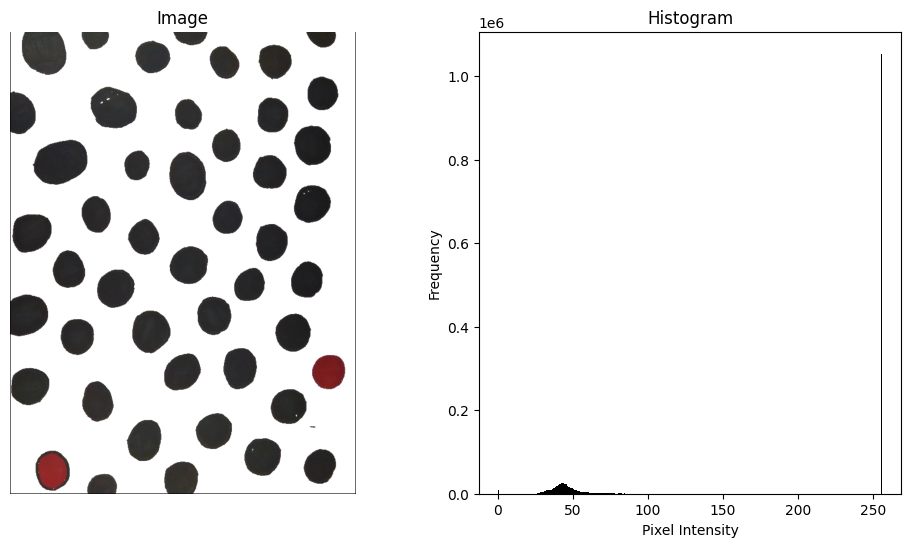

In [296]:
dots_img_thrs_region = dots_img.copy()
for i in range(dots_img_thrs_region.shape[0]):
    for j in range(dots_img_thrs_region.shape[1]):
        b = dots_img_thrs_region[i, j, 0]
        g = dots_img_thrs_region[i, j, 1]
        r = dots_img_thrs_region[i, j, 2]

        # Get Black Dots
        if (r < 100) and (g < 100) and (b < 100):
            dots_img_thrs_region[i, j] = [b,g,r]

        # Get Red Dots
        elif (r > 100) and (g < 100) and (b < 100):
            dots_img_thrs_region[i, j] = [b,g,r]

        # Make everything else White
        else:
            dots_img_thrs_region[i, j] = [255, 255, 255]

plot_image_and_histogram(dots_img_thrs_region)

In [297]:
dots_img_gray = cv2.cvtColor(dots_img, cv2.COLOR_BGR2GRAY)

#### Iterative

Iteration 1: mu_foreground = 53.36731200932667, mu_background = 157.80594872780335, new_mu = 105.58663036856501
Iteration 2: mu_foreground = 45.417304672845255, mu_background = 155.90916356039114, new_mu = 100.6632341166182


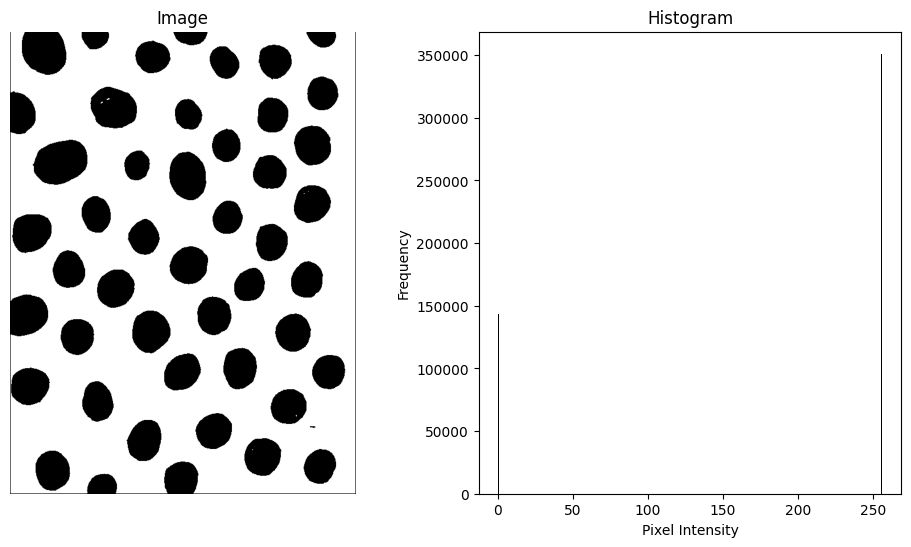

In [298]:
dots_img_iterative = dots_img_gray.copy()

initial_mu = np.average(dots_img_iterative)

for iteration in range(10):
    foreground_pixels = []
    background_pixels = []

    for i in dots_img_iterative:
        for j in i:
            if j < initial_mu:
                foreground_pixels.append(j)
            else:
                background_pixels.append(j)

    mu_foreground = np.mean(foreground_pixels)
    mu_background = np.mean(background_pixels)

    new_mu = (mu_foreground + mu_background) / 2

    if abs(new_mu - initial_mu) < 0.5:
        break
    print(f"Iteration {iteration+1}: mu_foreground = {mu_foreground}, mu_background = {mu_background}, new_mu = {new_mu}")
    initial_mu = new_mu

final_threshold = initial_mu
for i in range(dots_img_iterative.shape[0]):
    for j in range(dots_img_iterative.shape[1]):
        if dots_img_iterative[i, j] < final_threshold:
            dots_img_iterative[i, j] = 0
        else:
            dots_img_iterative[i, j] = 255
plot_image_and_histogram(dots_img_iterative)

#### Double Thresholding for region growing

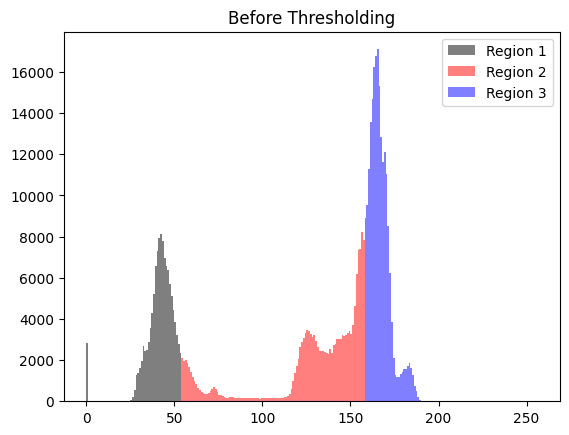

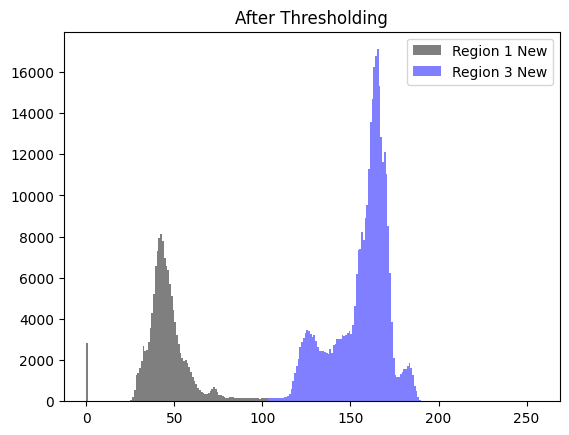

In [299]:
dots_img_double = dots_img_gray.copy()

initial_mu1 = 53.367
initial_mu2 = 157.805

region1 = dots_img_double[dots_img_double < initial_mu1]
region2 = dots_img_double[(dots_img_double >= initial_mu1) & (dots_img_double < initial_mu2)]
region3 = dots_img_double[dots_img_double >= initial_mu2]

plt.hist(region1, bins=256, range=[0, 256], color='black', alpha=0.5, label='Region 1')
plt.hist(region2, bins=256, range=[0, 256], color='red', alpha=0.5, label='Region 2')
plt.hist(region3, bins=256, range=[0, 256], color='blue', alpha=0.5, label='Region 3')
plt.title('Before Thresholding')
plt.legend()
plt.show()

threshold = max(region1) + 50
region1_new = region1.tolist()
region3_new = region3.tolist()
for i in region2:
    if i < threshold:
        region1_new.append(i)
    else:
        region3_new.append(i)
plt.hist(region1_new, bins=256, range=[0, 256], color='black', alpha=0.5, label='Region 1 New')
plt.hist(region3_new, bins=256, range=[0, 256], color='blue', alpha=0.5, label='Region 3 New')
plt.title('After Thresholding')
plt.legend()
plt.show()


#### Otsu Thresholding

Otsu Threshold Value = 100


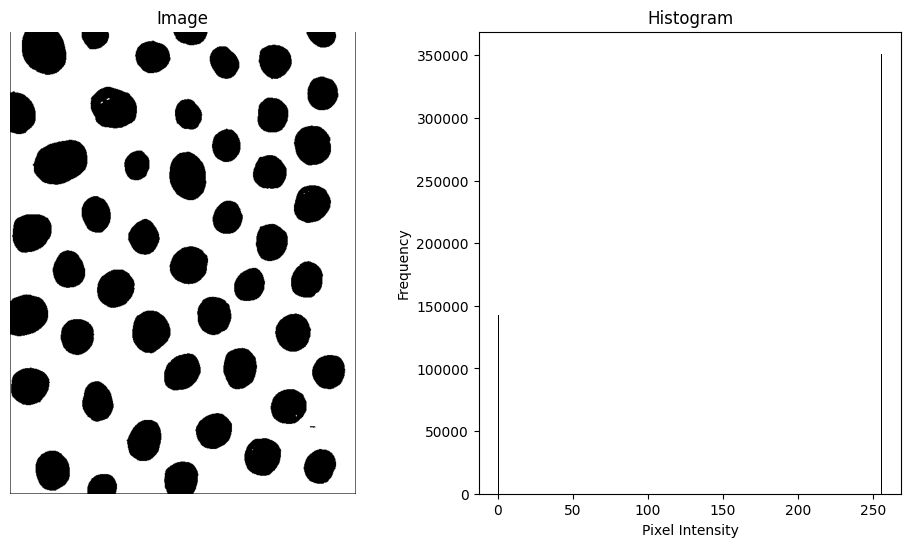

In [300]:
# implement otsu thresholding

# _, otsu_thresholded = cv2.threshold(dots_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

def otsu_threshold(gray):
    pixels = gray.ravel()
    total = pixels.size

    # Histogram (256 bins for 0–255)
    hist = np.zeros(256)
    for p in pixels:
        hist[p] += 1

    # Normalize to probability
    prob = hist / total

    # Cumulative sums
    omega = np.zeros(256)   # class probabilities
    mu = np.zeros(256)      # class means

    omega[0] = prob[0]
    mu[0] = 0 * prob[0]

    for i in range(1, 256):
        omega[i] = omega[i-1] + prob[i]
        mu[i] = mu[i-1] + i * prob[i]

    mu_t = mu[-1]  # global mean

    # Maximize between-class variance
    sigma_b_sq = np.zeros(256)

    for t in range(256):
        if omega[t] == 0 or omega[t] == 1:
            continue

        mu0 = mu[t] / omega[t]
        mu1 = (mu_t - mu[t]) / (1 - omega[t])

        sigma_b_sq[t] = omega[t] * (1 - omega[t]) * (mu0 - mu1) ** 2

    # Optimal threshold
    t_star = np.argmax(sigma_b_sq)

    return t_star


otsu_thresh_value = otsu_threshold(dots_img_gray)
print("Otsu Threshold Value =",otsu_thresh_value)
otsu_thresholded = np.where(dots_img_gray >= otsu_thresh_value, 255, 0).astype(np.uint8)
plot_image_and_histogram(otsu_thresholded)

#### Adaptive Mean Thresholding

----

## Question 4

Shape of fence image = (1668, 1668)


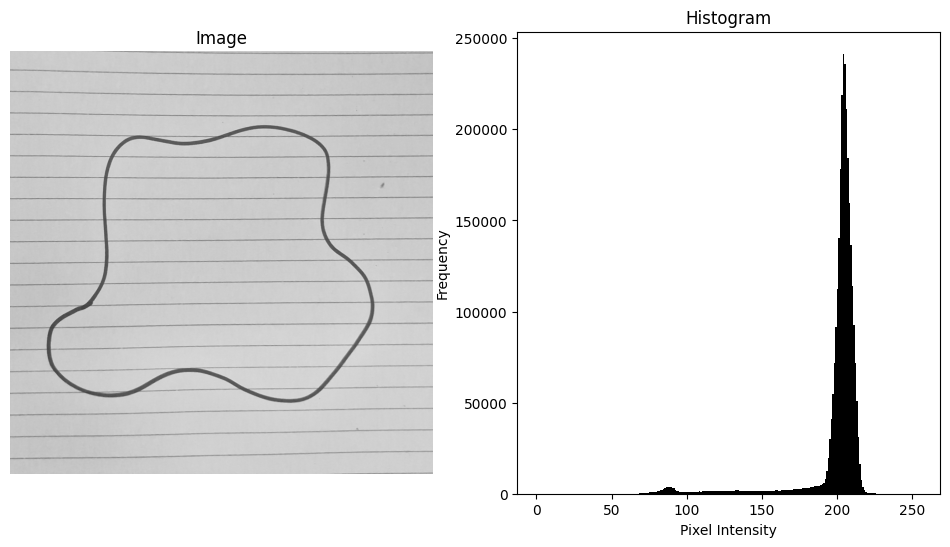

In [301]:
fence = cv2.imread("fence.jpg")
fence_gray = cv2.cvtColor(fence, cv2.COLOR_BGR2GRAY)
print("Shape of fence image =",np.shape(fence_gray))
plot_image_and_histogram(fence_gray)

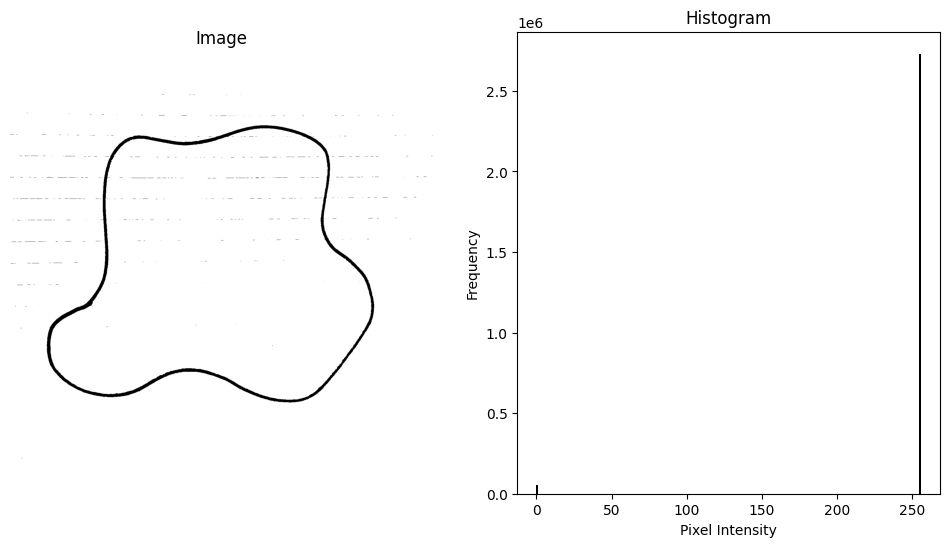

In [302]:
fence_thrs = fence_gray.copy()

for i in fence_thrs:
    for j in range(len(i)):
        if i[j] < 100:
            i[j] = 0
        else:
            i[j] = 255
plot_image_and_histogram(fence_thrs)

In [303]:
# apply otsu thresholding on fence image
otsu_thresh_value_fence = otsu_threshold(fence_gray)
print(otsu_thresh_value_fence)

159


In [304]:
# save original and thresholded images
cv2.imwrite("fence_original.jpg", fence_gray)
cv2.imwrite("fence_thresholded.jpg", fence_thrs)

True

In [305]:
h, w = fence_gray.shape
r = 28

for i in range(50):
    # Valid center range
    cx = random.randint(r, w - r - 1)
    cy = random.randint(r, h - r - 1)

    fence_gray_circles = fence_thrs.copy()

    cv2.circle(fence_gray_circles, (cx, cy), r, 0,-1)
    cv2.imwrite("fence/fence_circle_"+str(i)+".jpg", fence_gray_circles)

----

## Question 5

Shape of brain image = (695, 765)


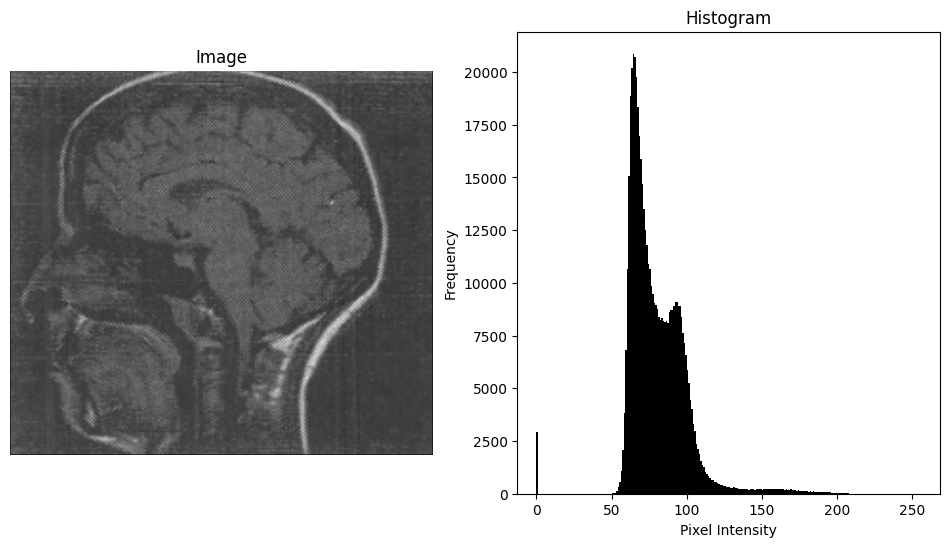

True

In [306]:
brain_img = cv2.imread("brain.png")
brain_gray = cv2.cvtColor(brain_img, cv2.COLOR_BGR2GRAY)
print("Shape of brain image =",np.shape(brain_gray))

plot_image_and_histogram(brain_gray)
cv2.imwrite('brain/brain_gray.png', brain_gray)

256


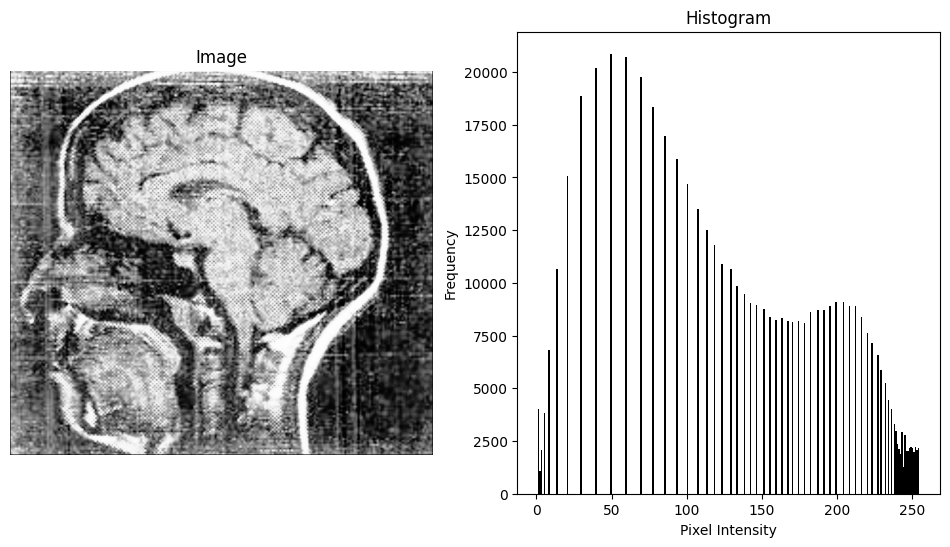

In [307]:
def histogram_equalization(gray):
    h, w = gray.shape
    N = h * w

    hist = np.histogram(gray, bins=256, range=(0,256))[0]
    pdf = hist / N
    print(len(pdf))

    cdf = np.zeros(256)
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + pdf[i]

    T = np.floor(255 * cdf)

    eq = np.zeros_like(gray)
    for i in range(h):
        for j in range(w):
            eq[i, j] = T[gray[i, j]]

    return [eq,pdf,cdf,T]

brain_eq = histogram_equalization(brain_gray)[0]
cv2.imwrite('brain/brain_equalized.png', brain_eq)
plot_image_and_histogram(brain_eq)

256
256


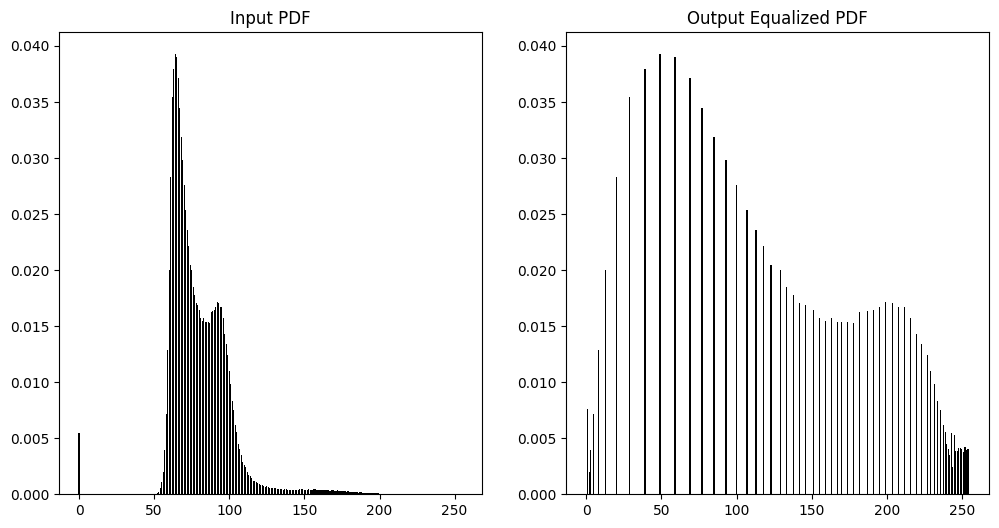

In [308]:

input_pdf = histogram_equalization(brain_gray)[1]

eq_pdf = histogram_equalization(brain_eq)[1]

fig1, axs1 = plt.subplots(1, 2, figsize=(12, 6))

axs1[1].bar(range(256), eq_pdf, color='black')
axs1[1].set_title('Output Equalized PDF')

axs1[0].bar(range(256), input_pdf, color='black')
axs1[0].set_title('Input PDF')

plt.show()

256
256


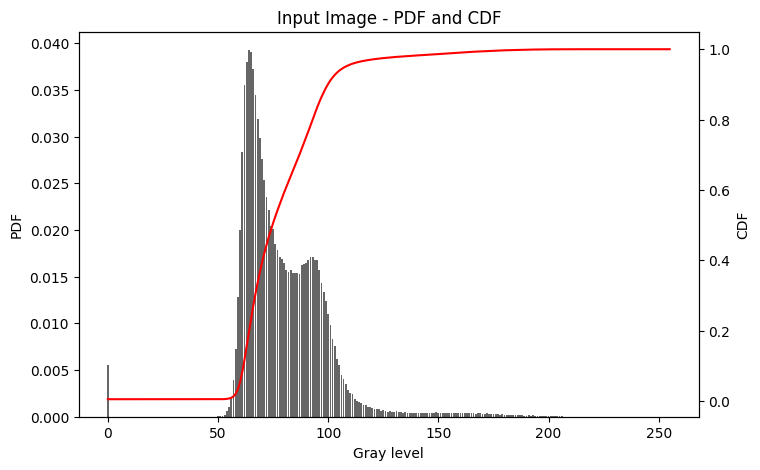

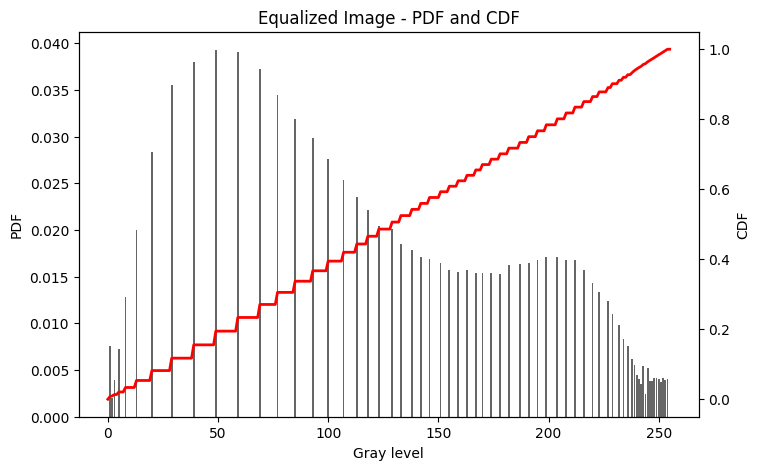

In [309]:
input_cdf = histogram_equalization(brain_gray)[2]
brain_eq_cdf = histogram_equalization(brain_eq)[2]

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(range(256), input_pdf, color='black', alpha=0.6, label='PDF')
ax1.set_xlabel('Gray level')
ax1.set_ylabel('PDF')

ax2 = ax1.twinx()
ax2.plot(range(256), input_cdf, color='red',label='CDF')
ax2.set_ylabel('CDF')

plt.title('Input Image - PDF and CDF')

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(range(256), eq_pdf, color='black', alpha=0.6, label='PDF')
ax1.set_xlabel('Gray level')
ax1.set_ylabel('PDF')

ax2 = ax1.twinx()
ax2.plot(range(256), brain_eq_cdf, color='red', linewidth=2, label='CDF')
ax2.set_ylabel('CDF')

plt.title('Equalized Image - PDF and CDF')
plt.show()



In [310]:
mean_input_brain = np.mean(brain_gray)
mean_output_brain = np.mean(brain_eq)
print("Mean intensity of input brain image =",mean_input_brain)
print("Mean intensity of output brain image =",mean_output_brain)

Mean intensity of input brain image = 79.6337950815818
Mean intensity of output brain image = 129.7091964075798
